In [ ]:
def conv_forward_naive(x, w, b, conv_param):
    """A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and
    width W. We convolve each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.

    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N, C, H, W = x.shape
    F, _, HH, WW = w.shape
    stride, pad = conv_param['stride'], conv_param['pad']
    H_out = 1 + (H + 2 * pad - HH) // stride  # Use `//` for python3
    W_out = 1 + (W + 2 * pad - WW) // stride
    out = np.zeros((N, F, H_out, W_out))

    x_pad = np.pad(x, ((0,), (0,), (pad,), (pad,)), mode='constant', constant_values=0)

    for n in range(N):
    	for f in range(F):
    		for h_out in range(H_out):
    			for w_out in range(W_out):
    				out[n, f, h_out, w_out] = np.sum(
    					x_pad[n, :, h_out*stride:h_out*stride+HH, w_out*stride:w_out*stride+WW]*w[f, :]) + b[f]


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache

**Convolution**


http://aikorea.org/cs231n/convolutional-networks/



In [ ]:
def conv_backward_naive(dout, cache):
    """A naive implementation of the backward pass for a convolutional layer.

    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    
    x, w, b, conv_param = cache
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape
    _, _, H_out, W_out = dout.shape
    stride, pad = conv_param['stride'], conv_param['pad']

    x_pad = np.pad(x, ((0,), (0,), (pad,), (pad,)), mode='constant', constant_values=0)

    dx_pad = np.zeros_like(x_pad)
    dw = np.zeros_like(w)
    db = np.zeros_like(b)

    # Ref: https://github.com/MahanFathi/CS231/blob/ecab92ed8627ea0ea513a54fc2019516d446c106/assignment2/cs231n/layers.py#L483-L491
    for n in range(N):
    	for f in range(F):
    		db[f] += np.sum(dout[n, f])
    		for h_out in range(H_out):
    			for w_out in range(W_out):
    				dw[f] += x_pad[n, :, h_out*stride:h_out*stride+HH, w_out*stride:w_out*stride+WW] * \
    				dout[n, f, h_out, w_out]
    				dx_pad[n, :, h_out*stride:h_out*stride+HH, w_out*stride:w_out*stride+WW] += w[f] * \
    				dout[n, f, h_out, w_out]

    dx = dx_pad[:, :, pad:pad+H, pad:pad+W]


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

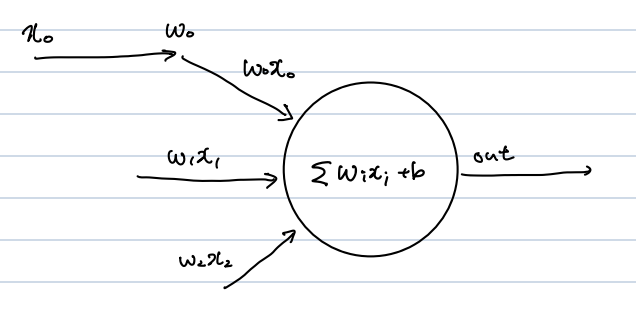

**conv_backward**

>$ db = \frac{dLoss}{dout} \cdot \frac{dout}{db} = dout $  
>
>$ dw = \frac{dLoss}{dout} \cdot \frac{dout}{dw} = dout \cdot \sum{x} $  
>
>$ dx = \frac{dLoss}{dout} \cdot \frac{dout}{dx} = dout \cdot \sum{w} $  

In [ ]:
def max_pool_forward_naive(x, pool_param):
    """A naive implementation of the forward pass for a max-pooling layer.

    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions

    No padding is necessary here, eg you can assume:
      - (H - pool_height) % stride == 0
      - (W - pool_width) % stride == 0

    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    
    N, C, H, W = x.shape
    pool_height = pool_param['pool_height']
    pool_width = pool_param['pool_width']
    stride = pool_param['stride']
    H_out = 1 + (H - pool_height) // stride
    W_out = 1 + (W - pool_width) // stride
    out = np.zeros((N, C, H_out, W_out))

    for n in range(N):
    	for h_out in range(H_out):
    		for w_out in range(W_out):
    			out[n, :, h_out, w_out] = np.max(x[n, :, h_out*stride:h_out*stride+pool_height,
    				w_out*stride:w_out*stride+pool_width], axis=(-1, -2)) # axis can also be (1, 2)


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache

In [ ]:
def max_pool_backward_naive(dout, cache):
    """A naive implementation of the backward pass for a max-pooling layer.

    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.

    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    
    x, pool_param = cache
    N, C, H, W = x.shape
    pool_height = pool_param['pool_height']
    pool_width = pool_param['pool_width']
    stride = pool_param['stride']
    H_out = 1 + (H - pool_height) // stride
    W_out = 1 + (W - pool_width) // stride
    dx = np.zeros_like(x)

    for n in range(N):
    	for c in range(C):
    		for h in range(H_out):
    			for w in range(W_out):
    				# Find the index (row, col) of the max value
    				# Ref: examples of https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.argmax.html
    				ind = np.unravel_index(np.argmax(x[n, c, h*stride:h*stride+pool_height,
    					w*stride:w*stride+pool_width], axis=None), (pool_height, pool_width))
    				
    				dx[n, c, h*stride:h*stride+pool_height, w*stride:w*stride+pool_width][ind] = \
    				dout[n, c, h, w]

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx